In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import entropy
import seaborn as sns

In [14]:
#coordinates = "Chr5:3564493-3565087"
#coordinates = "Chr5:552887-553012"
coordinates = "Chr5:3500000-3600000"
start = int(coordinates.split(":")[1].split("-")[0])
end = int(coordinates.split(":")[1].split("-")[1])

df = pd.read_parquet(f"logits_{coordinates}.parquet")
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
df["ref_nuc"] = df.apply(lambda row: genome[row.chromosome][row.pos], axis=1)
df.set_index("pos", inplace=True, drop=False)
df

,pos,chromosome,A,C,G,T,ref_nuc
pos,,,,,,,
3500000,3500000,Chr5,0.261700,-0.510872,0.399737,0.259875,A
3500001,3500001,Chr5,0.980765,-0.262463,0.481138,-0.705114,C
3500002,3500002,Chr5,0.554887,-0.531758,-0.234655,0.614921,A
3500003,3500003,Chr5,0.152100,-0.349591,0.674923,-0.029989,G
3500004,3500004,Chr5,0.409633,0.238507,-0.419348,0.230997,C
...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.256520,-0.629005,0.378055,0.439862,C
3599996,3599996,Chr5,0.351747,-0.415634,0.503562,0.018792,G
3599997,3599997,Chr5,-0.105351,0.421414,-0.115145,0.253361,T


In [15]:
nucleotides = ["A", "C", "G", "T"]

In [16]:
df_llr = df.copy()
for nucleotide in nucleotides:
    df_llr[nucleotide] = df_llr.apply(lambda row: row[nucleotide]-row[row.ref_nuc], axis=1)
df_llr

,pos,chromosome,A,C,G,T,ref_nuc
pos,,,,,,,
3500000,3500000,Chr5,0.000000,-0.510872,0.399737,0.259875,A
3500001,3500001,Chr5,1.243228,0.000000,0.481138,-0.705114,C
3500002,3500002,Chr5,0.000000,-0.531758,-0.234655,0.614921,A
3500003,3500003,Chr5,-0.522823,-1.024514,0.000000,-0.029989,G
3500004,3500004,Chr5,0.171126,0.000000,-0.419348,0.230997,C
...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.885525,0.000000,0.378055,0.439862,C
3599996,3599996,Chr5,-0.151814,-0.919196,0.000000,0.018792,G
3599997,3599997,Chr5,-0.358712,0.168053,-0.368506,0.000000,T


In [17]:
df.loc[:, nucleotides] = softmax(df[nucleotides].values, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc
pos,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C
...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T


In [18]:
for nucleotide in nucleotides:
    df[f"ref_1hot_{nucleotide}"] = df.apply(lambda row: 1.0 if row.ref_nuc==nucleotide else 0.0, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T
pos,,,,,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A,1.0,0.0,0.0,0.0
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C,0.0,1.0,0.0,0.0
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A,1.0,0.0,0.0,0.0
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G,0.0,0.0,1.0,0.0
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C,0.0,1.0,0.0,0.0
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G,0.0,0.0,1.0,0.0
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T,0.0,0.0,0.0,1.0


In [19]:
def cross_entropy(y, y_pre):
    return -np.sum(y*np.log(y_pre), axis=1)

In [20]:
true_cols = [f"ref_1hot_{nucleotide}" for nucleotide in nucleotides]
pred_cols = nucleotides
df["cross_entropy"] = cross_entropy(df[true_cols].values, df[pred_cols].values)
df

,pos,chromosome,A,C,G,T,ref_nuc,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T,cross_entropy
pos,,,,,,,,,,,,
3500000,3500000,Chr5,0.277160,0.127999,0.318185,0.276655,A,1.0,0.0,0.0,0.0,1.283159
3500001,3500001,Chr5,0.480656,0.138646,0.291641,0.089057,C,0.0,1.0,0.0,0.0,1.975831
3500002,3500002,Chr5,0.350475,0.118231,0.159134,0.372160,A,1.0,0.0,0.0,0.0,1.048466
3500003,3500003,Chr5,0.242376,0.146760,0.408836,0.202027,G,0.0,0.0,1.0,0.0,0.894441
3500004,3500004,Chr5,0.320963,0.270481,0.140099,0.268457,C,0.0,1.0,0.0,0.0,1.307554
...,...,...,...,...,...,...,...,...,...,...,...,...
3599995,3599995,Chr5,0.267169,0.110206,0.301695,0.320930,C,0.0,1.0,0.0,0.0,2.205400
3599996,3599996,Chr5,0.298956,0.138783,0.347968,0.214292,G,0.0,0.0,1.0,0.0,1.055644
3599997,3599997,Chr5,0.195496,0.331063,0.193591,0.279850,T,0.0,0.0,0.0,1.0,1.273501


In [21]:
df["perplexity"] = np.exp(df.cross_entropy)

In [25]:
df.loc[min_pos:max_pos]

,pos,chromosome,A,C,G,T,ref_nuc,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T,cross_entropy,perplexity
pos,,,,,,,,,,,,,
3564508,3564508,Chr5,0.389736,0.149873,0.127564,0.332828,A,1.0,0.0,0.0,0.0,0.942285,2.565838
3564509,3564509,Chr5,0.258735,0.259135,0.069826,0.412305,T,0.0,0.0,0.0,1.0,0.885992,2.425389
3564510,3564510,Chr5,0.234496,0.166049,0.297017,0.302438,G,0.0,0.0,1.0,0.0,1.213966,3.366811
3564511,3564511,Chr5,0.166547,0.127577,0.277064,0.428812,A,1.0,0.0,0.0,0.0,1.792475,6.004295
3564512,3564512,Chr5,0.349203,0.132347,0.256068,0.262382,G,0.0,0.0,1.0,0.0,1.362312,3.905210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564857,3564857,Chr5,0.467879,0.221764,0.136555,0.173802,C,0.0,1.0,0.0,0.0,1.506141,4.509294
3564858,3564858,Chr5,0.182784,0.068822,0.044286,0.704108,A,1.0,0.0,0.0,0.0,1.699449,5.470934
3564859,3564859,Chr5,0.304926,0.462659,0.100485,0.131930,G,0.0,0.0,1.0,0.0,2.297743,9.951696


In [30]:
df.loc[min_pos:max_pos].perplexity

pos
3564508    2.565838
3564509    2.425389
3564510    3.366811
3564511    6.004295
3564512    3.905210
             ...   
3564857    4.509294
3564858    5.470934
3564859    9.951696
3564860    1.323931
3564861    1.705084
Name: perplexity, Length: 354, dtype: float64

In [34]:
df_llr.loc[min_pos:max_pos, nucleotides]

,A,C,G,T
pos,,,,
3564508,0.000000,-0.287424,-0.448594,0.510415
3564509,-0.465960,-0.464416,-1.775762,0.000000
3564510,-0.236351,-0.581507,0.000000,0.331093
3564511,0.000000,-0.452359,0.323174,0.759942
3564512,0.310211,-0.660019,0.000000,0.216166
...,...,...,...,...
3564857,0.746594,0.000000,-0.388410,-0.147220
3564858,0.000000,-0.631039,-1.071908,1.694364
3564859,1.110056,1.526978,0.000000,-0.342515


<AxesSubplot:ylabel='perplexity'>

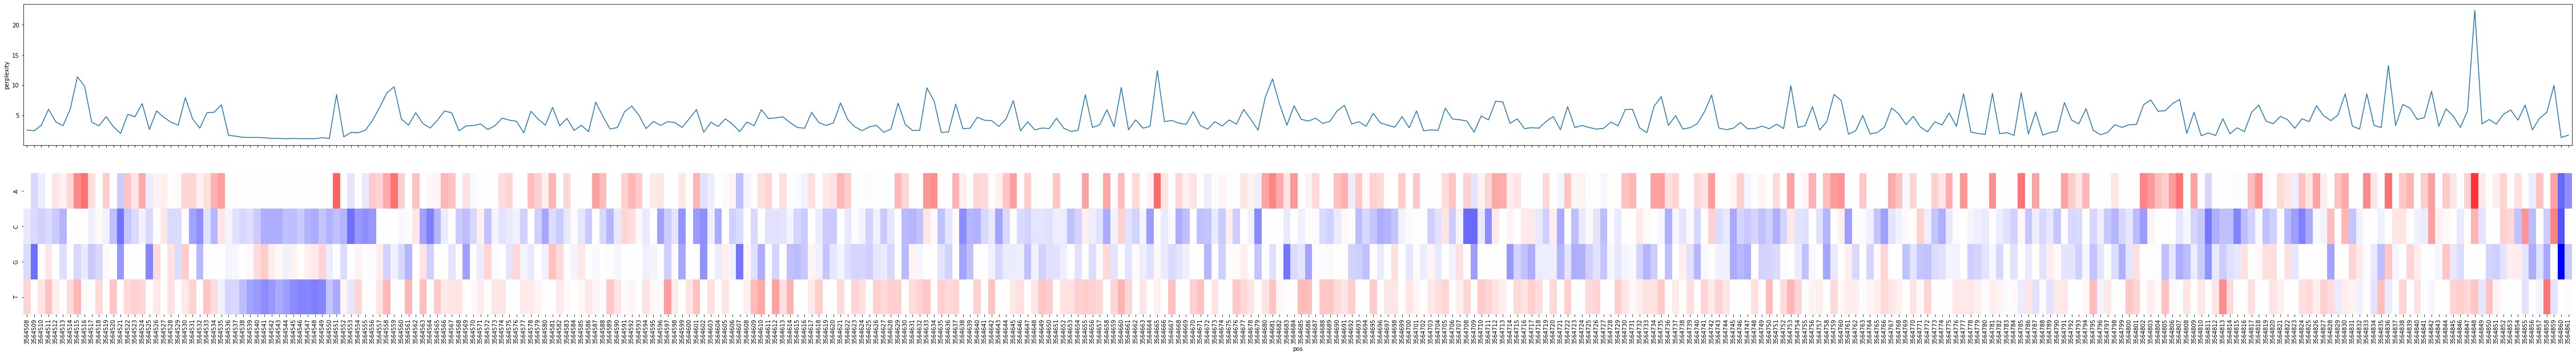

In [41]:
# Chr5:3,564,508-3,564,861
min_pos = 3564508
max_pos = 3564861

#plt.figure(figsize=(40, 5))

fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(80, 10))



g = sns.heatmap(
    data=df_llr.loc[min_pos:max_pos, nucleotides].T,
    #square=True,
    cbar=False,
    cbar_kws={"orientation": "vertical", "shrink": .05, "label": "LLR"},
    center=0,
    cmap="bwr",
    #annot=annot,
    #fmt = ''
    ax=axes[1]
)

sns.lineplot(data=df.loc[min_pos:max_pos], y="perplexity", x=g.get_xticks(), ax=axes[0])
#df.loc[min_pos:max_pos].plot(x="pos", y="perplexity", ax=axes[0])
# doesn't work because sns heatmap has a different actual xtick range.

In [47]:
with open(f'wig_perplexity_{coordinates}.txt', 'a') as file:
    file.write(f'fixedStep  chrom=Chr5 start={start+1}  step=1\n')  # check Chr vs. chr
    df.to_csv(file, columns=["perplexity"], header=False, index=False)

In [48]:
!head wig*

fixedStep  chrom=Chr5 start=3500001  step=1
3.6080182634160574
7.212613414699377
2.8532721019041967
2.4459678935679694
3.697120494332242
1.8633079633266865
3.867195624206221
1.6823798226034428
6.682676612531764


In [53]:
!ls wig*

wigToBigWig  wig_perplexity_Chr5:3500000-3600000.txt


In [49]:
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/wigToBigWig
!chmod +x wigToBigWig

--2022-06-18 13:31:03--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/wigToBigWig
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9527800 (9.1M)
Saving to: 'wigToBigWig'

100%[======================================>] 9,527,800   5.19MB/s   in 1.7s   

2022-06-18 13:31:04 (5.19 MB/s) - 'wigToBigWig' saved [9527800/9527800]



In [55]:
!ls ../../data/chromatin

Snakefile     intersection.bed		plots		 windows.bed
chrom.sizes   intersection.seq.bed	processed_peaks
datasets      peaks			tair10.fa
find_urls.py  plant_reg_map_source.txt	tracks.tsv


In [56]:
!cat ../../data/chromatin/chrom.sizes

Chr1	30427671
Chr2	19698289
Chr3	23459830
Chr4	18585056
Chr5	26975502


In [57]:
!./wigToBigWig wig_perplexity_Chr5:3500000-3600000.txt ../../data/chromatin/chrom.sizes wig_perplexity_Chr5:3500000-3600000.bw

In [59]:
!ls -sh | grep -i wig

9.1M wigToBigWig
476K wig_perplexity_Chr5:3500000-3600000.bw
1.8M wig_perplexity_Chr5:3500000-3600000.txt
